AUTHORS:
- Eder Tarifa
- Adonis García
- Mario García


## Imports

In [ ]:
!pip install pyAgrum

In [ ]:
# PREPROCESSING
from sklearn.preprocessing import StandardScaler
# Feature selection
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectPercentile, f_classif, SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import Lasso, Ridge, ElasticNet


# DATA ANALYSIS
import numpy as np
import pandas as pd

# MODELS
# Model selection and metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

# Augmented Naive Bayes
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as ntbk

# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest, AdaBoost, Boosting
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingRegressor

# PLOTTING
from matplotlib import pyplot as plt

# OTHER
import warnings
warnings.filterwarnings('ignore')


## Load and describe data

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']
n_features = X_train.shape[1]

# Check the shape of the dataset
print(f"Shape of the train dataset: records: {train.shape[0]}, attributes: {train.shape[1]}")
print(f"Shape of the test dataset: records: {test.shape[0]}, attributes: {test.shape[1]}")
print(f"Data types of the attributes: {train.dtypes.unique()}")
# Check for missing values
print(f"Missing values: train data: {train.isnull().sum().sum()}, test data: {test.isnull().sum().sum()}")
# Check the distribution of the target variable
print(f"Target variable distribution (proportion): train: {train['class'].value_counts(1)}, test: {test['class'].value_counts(1)}")

Shape of the train dataset: records: 3000, attributes: 91
Shape of the test dataset: records: 2000, attributes: 91
Data types of the attributes: [dtype('float64') dtype('int64')]
Missing values: train data: 0, test data: 0
Target variable distribution (proportion): train: class
1    0.414333
2    0.349667
0    0.236000
Name: proportion, dtype: float64, test: class
1    0.4295
2    0.3620
0    0.2085
Name: proportion, dtype: float64


In [ ]:
print(X_train.head())

      lonsb      qpzkm     knyrk     dtymf     shmcy     udpkr     ryjkv  \
1 -2.724062  26.536867 -0.075150  0.926834  2.987854  3.135959  1.436290   
2 -0.690392  -5.542998 -0.523969  0.834899  2.317522  0.359343  0.081809   
3 -0.265749 -10.673678 -1.002556 -1.132291 -0.726886  0.071061  1.330116   
4 -0.991868  23.474827 -2.272993 -0.527228  5.363455  0.707706  1.544896   
5 -0.254343   2.501485 -2.026073 -0.897807 -7.134404  3.224649  0.237726   

      pswtk     onmrn      pxlhg  ...     lzxyw     veogh     ageae     krdmr  \
1 -1.193564  7.250148  10.248741  ...  0.209406  0.075455 -0.026040 -1.130297   
2 -0.772035  1.944000  -0.499702  ...  0.100610  0.076026  0.088022 -1.408651   
3 -0.652022  0.984688   9.409884  ... -0.659253  0.042153 -0.034703 -0.584373   
4 -0.530256  0.856160  -7.263302  ... -0.226195 -0.084540 -0.052739 -2.514914   
5 -0.076060  1.813765   4.008310  ... -1.059912  0.014152 -0.089899 -0.061885   

      yhiua     mhvay      uwwjo     bnnsl     wzdci    

# Preprocessing

## Filtering Methods

### Filtering: Basic Techniques

In [ ]:
def item_in_A_not_in_B(A:list, B:list):
  return [item for item in A if item not in B]

def fit_transform_df(clf, X_train, X_test, y_train=y_train):
  X_train_t = clf.fit_transform(X_train, y_train)
  X_train_t = pd.DataFrame(X_train_t, columns=clf.get_feature_names_out())
  X_test_t = clf.transform(X_test)
  X_test_t = pd.DataFrame(X_test_t, columns=clf.get_feature_names_out())
  return X_train_t, X_test_t

def feature_selection(method_name, clf, X_train, X_test):
  X_train_t, X_test_t = fit_transform_df(clf, X_train, X_test, y_train=y_train)
  t_features_names = X_train_t.columns.tolist()
  t_deleted_feature_names = item_in_A_not_in_B(feature_names, t_features_names)
  print(f"Número de variables eliminadas con {method_name}: {X_train.shape[1]-X_train_t.shape[1]}")
  print(f"Nombres de las variables eliminadas con {method_name}: {t_deleted_feature_names}")
  return X_train_t, X_test_t, t_deleted_feature_names

In [ ]:
feature_names = X_train.columns.tolist()

###########################################################################################################################
# Filtering: Basic Techniques
###########################################################################################################################


# CONSTANT FEATURES
clf1 = VarianceThreshold(threshold=0)
X_train_pre1, X_test_pre1, constant_deleted_feature_names = feature_selection(method_name= 'constantes', clf=clf1, X_train=X_train, X_test=X_test)
print("")

# CUASI-CONSTANT FEATURES
clf2 = VarianceThreshold(threshold=0.1)
X_train_pre2, X_test_pre2, cuasiconstant_deleted_feature_names = feature_selection(method_name= 'cuasi-constantes', clf=clf2, X_train=X_train, X_test=X_test)
print("")

# DUPLICATED FEATURES
X_train_pre3 = np.unique(X_train, axis=1)
X_test_pre3 = np.unique(X_test, axis=1)
n_duplicate_features = X_train_pre3.shape[1]
print(f"Variables duplicadas eliminadas: {X_train.shape[1]-n_duplicate_features}")
print("")

Número de variables eliminadas con constantes: 0
Nombres de las variables eliminadas con constantes: []

Número de variables eliminadas con cuasi-constantes: 15
Nombres de las variables eliminadas con cuasi-constantes: ['pmrpk', 'vgxbd', 'iwbff', 'eyooz', 'buvtp', 'ukwxt', 'noqql', 'xukrh', 'lzzcw', 'kseen', 'lbguf', 'hamfd', 'veogh', 'ageae', 'wzdci']

Variables duplicadas eliminadas: 0



In conclusion, basic filtering techniques do not modify the dataset.

## Filtering: Statistical Techniques


We use the `SelectPercentile` function from `sklearn.feature_selection` to select features with the highest percentile values in statistical tests. This function is useful when you have a large number of features and want to keep only a certain fraction of them.

#### ANOVA

ANOVA (Analysis of Variance) is a statistical technique used to determine if there are significant differences between the means of two or more groups. It is used to compare the variance between different feature groups with the variance within each feature group.  
If the variance between groups is significantly greater than the variance within the groups, it can be concluded that the feature has a significant effect on the target variable and is, therefore, an important feature.


#### Mutual information

`mutual_info_classif` is useful for feature selection because it can capture any type of statistical dependency, and being non-negative, this function can be used to select the most relevant features.

The percentile=90 parameter indicates that features in the top 90th percentile of the highest scores will be selected. In other words, the 90% of the original features with the highest mutual information scores with the target variable will be chosen.

We wanted to use the `GenericUnivariateSelect` filter to remove irrelevant features. We tried using `mode = fdr` because we don't know how many features we want to eliminate, but we do know that we start with a large number (92). We also tested with `percentile` using various values for the `param` parameter. However, in all cases, it removed almost all the features. Still, since we have numerical features and a categorical target, we can use the ANOVA statistical technique.

In [ ]:
###########################################################################################################################
# Filtering: Statistical Techniques
###########################################################################################################################

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANOVA
clfANOVA = SelectPercentile(f_classif, percentile=90)
X_train_anova, X_test_anova, anova_deleted_feature_names = feature_selection(method_name= 'ANOVA (percentil 90)', clf=clfANOVA, X_train=X_train_scaled, X_test=X_test_scaled)
print("")

# MUTUAL INFORMATION
clfmutualinfo = SelectPercentile(mutual_info_classif, percentile=90)
X_train_mutualinfo, X_test_mutualinfo, mutualinfo_deleted_feature_names = feature_selection(method_name= 'información mutua (percentil 90)', clf=clfmutualinfo, X_train=X_train_scaled, X_test=X_test_scaled)
print("")

Número de variables eliminadas con ANOVA (percentil 90): 9
Nombres de las variables eliminadas con ANOVA (percentil 90): ['lonsb', 'qpzkm', 'knyrk', 'dtymf', 'shmcy', 'udpkr', 'ryjkv', 'pswtk', 'onmrn', 'pxlhg', 'dekmg', 'kxoyp', 'zrlch', 'pmrpk', 'lyteu', 'plpgy', 'vgxbd', 'jmurn', 'svpei', 'tmljy', 'exccb', 'jygnb', 'hfkdr', 'qqxzm', 'tegac', 'vpqgg', 'vlcuy', 'ylwat', 'iwbff', 'ottdb', 'yxhoh', 'opbjv', 'eyooz', 'cjqls', 'cezpu', 'buvtp', 'xoimi', 'deudu', 'qnsri', 'ajfzn', 'pwmtq', 'zupbm', 'mcuyp', 'swuay', 'ukwxt', 'xfnfb', 'yojzk', 'noqql', 'pvbry', 'awjyb', 'xukrh', 'ivcbf', 'lzzcw', 'edadb', 'hpssi', 'ydzpk', 'jsczi', 'kseen', 'arcrt', 'zulgp', 'hbuxz', 'iargb', 'vdcei', 'tfsal', 'ruwcq', 'fygid', 'kcgkq', 'xflhp', 'lbguf', 'ijxff', 'xmfvu', 'tgyjq', 'hamfd', 'zwfia', 'sprzc', 'lwhua', 'jbynh', 'afqti', 'kfcgs', 'szncq', 'lzxyw', 'veogh', 'ageae', 'krdmr', 'yhiua', 'mhvay', 'uwwjo', 'bnnsl', 'wzdci', 'ycwtf']

Número de variables eliminadas con información mutua (percentil 90)

In [ ]:
for feature in cuasiconstant_deleted_feature_names:
  if feature in anova_deleted_feature_names:
    print(f"Variable eliminada en ANOVA y cuasi-constante: {feature}")
print("")
for feature in cuasiconstant_deleted_feature_names:
  if feature in mutualinfo_deleted_feature_names:
    print(f"Variable eliminada en información mutua y cuasi-constante: {feature}")
print("")

for feature in mutualinfo_deleted_feature_names:
  if feature in anova_deleted_feature_names:
    print(f"Variable eliminada en ANOVA e información mutua: {feature}")

Variable eliminada en ANOVA y cuasi-constante: pmrpk
Variable eliminada en ANOVA y cuasi-constante: vgxbd
Variable eliminada en ANOVA y cuasi-constante: iwbff
Variable eliminada en ANOVA y cuasi-constante: eyooz
Variable eliminada en ANOVA y cuasi-constante: buvtp
Variable eliminada en ANOVA y cuasi-constante: ukwxt
Variable eliminada en ANOVA y cuasi-constante: noqql
Variable eliminada en ANOVA y cuasi-constante: xukrh
Variable eliminada en ANOVA y cuasi-constante: lzzcw
Variable eliminada en ANOVA y cuasi-constante: kseen
Variable eliminada en ANOVA y cuasi-constante: lbguf
Variable eliminada en ANOVA y cuasi-constante: hamfd
Variable eliminada en ANOVA y cuasi-constante: veogh
Variable eliminada en ANOVA y cuasi-constante: ageae
Variable eliminada en ANOVA y cuasi-constante: wzdci

Variable eliminada en información mutua y cuasi-constante: pmrpk
Variable eliminada en información mutua y cuasi-constante: vgxbd
Variable eliminada en información mutua y cuasi-constante: iwbff
Variable 

## Wrapper methods

### Heuristic search

We don't find it feasible to use exhaustive search because it has exponential complexity, and we have 92 features. The execution time would be too high.

Sequential Feature Selection is a feature selection technique that selects features by successively adding or removing them until a desired number of features is reached.

In [ ]:
###########################################################################################################################
# WRAPPER: SFS Naive Bayes
###########################################################################################################################

clf_sfs_nb = SFS(GaussianNB(), direction="forward", cv=10, n_jobs=-1, scoring='accuracy')
X_train_sfs_nb, X_test_sfs_nb, deleted_feature_names_sfs_nb = feature_selection(method_name= 'SFS NB', clf=clf_sfs_nb, X_train=X_train, X_test=X_test)

Número de variables eliminadas con SFS NB: 45
Nombres de las variables eliminadas con SFS NB: ['knyrk', 'dtymf', 'udpkr', 'pxlhg', 'zrlch', 'lyteu', 'plpgy', 'vgxbd', 'tmljy', 'exccb', 'qqxzm', 'vpqgg', 'ylwat', 'ottdb', 'yxhoh', 'cezpu', 'xoimi', 'qnsri', 'zupbm', 'mcuyp', 'xfnfb', 'yojzk', 'noqql', 'pvbry', 'xukrh', 'ivcbf', 'edadb', 'jsczi', 'arcrt', 'tfsal', 'xflhp', 'ijxff', 'xmfvu', 'tgyjq', 'hamfd', 'sprzc', 'jbynh', 'afqti', 'szncq', 'lzxyw', 'veogh', 'ageae', 'krdmr', 'uwwjo', 'bnnsl']


In [ ]:
X_train_sfs_nb.to_csv('X_train_SFS_nb.csv')
X_test_sfs_nb.to_csv('X_test_SFS_nb.csv')

In [ ]:
###########################################################################################################################
# WRAPPER: SFS Linear Discriminant Analysis
###########################################################################################################################

clf_sfs_lda = SFS(LinearDiscriminantAnalysis(), direction="forward", cv=10, n_jobs=-1, scoring='accuracy')
X_train_sfs_lda, X_test_sfs_lda, deleted_feature_names_sfs_lda = feature_selection(method_name= 'SFS LDA', clf=clf_sfs_lda, X_train=X_train, X_test=X_test)

Número de variables eliminadas con SFS LDA: 45
Nombres de las variables eliminadas con SFS LDA: ['qpzkm', 'knyrk', 'ryjkv', 'onmrn', 'pxlhg', 'zrlch', 'pmrpk', 'plpgy', 'vgxbd', 'jmurn', 'tmljy', 'exccb', 'vpqgg', 'vlcuy', 'ylwat', 'iwbff', 'ottdb', 'yxhoh', 'cezpu', 'xoimi', 'mcuyp', 'xfnfb', 'yojzk', 'awjyb', 'xukrh', 'ivcbf', 'lzzcw', 'arcrt', 'hbuxz', 'vdcei', 'fygid', 'ijxff', 'tgyjq', 'hamfd', 'sprzc', 'jbynh', 'kfcgs', 'lzxyw', 'ageae', 'krdmr', 'yhiua', 'mhvay', 'bnnsl', 'wzdci', 'ycwtf']


In [ ]:
X_train_sfs_lda.to_csv('X_train_SFS_lda.csv')
X_test_sfs_lda.to_csv('X_test_SFS_lda.csv')

In [ ]:
###########################################################################################################################
# WRAPPER: SFS Quadratic Discriminant Analysis
###########################################################################################################################

clf_sfs_qda = SFS(QuadraticDiscriminantAnalysis(), direction="forward", cv=10, n_jobs=-1, scoring='accuracy')
X_train_sfs_qda, X_test_sfs_qda, deleted_feature_names_sfs_qda = feature_selection(method_name= 'SFS QDA', clf=clf_sfs_qda, X_train=X_train, X_test=X_test)

Número de variables eliminadas con SFS QDA: 45
Nombres de las variables eliminadas con SFS QDA: ['lonsb', 'qpzkm', 'dtymf', 'udpkr', 'ryjkv', 'pswtk', 'zrlch', 'pmrpk', 'jmurn', 'hfkdr', 'qqxzm', 'ylwat', 'iwbff', 'ottdb', 'yxhoh', 'eyooz', 'cezpu', 'qnsri', 'pwmtq', 'mcuyp', 'swuay', 'ukwxt', 'xfnfb', 'yojzk', 'xukrh', 'lzzcw', 'ydzpk', 'kseen', 'arcrt', 'zulgp', 'hbuxz', 'iargb', 'tfsal', 'fygid', 'kcgkq', 'xflhp', 'kfcgs', 'szncq', 'lzxyw', 'veogh', 'ageae', 'mhvay', 'bnnsl', 'wzdci', 'ycwtf']


In [ ]:
X_train_sfs_qda.to_csv('X_train_SFS_qda.csv')
X_test_sfs_qda.to_csv('X_test_SFS_qda.csv')

## Embedded methods

We use Lasso because it helps us eliminate irrelevant or redundant variables.

In [ ]:
# Lasso feature selection
lasso = Lasso(alpha=0.01)
clf_lasso = SelectFromModel(lasso)
X_train_lasso, X_test_lasso, lasso_deleted_feature_names = feature_selection(method_name= 'Lasso', clf=clf_lasso, X_train=X_train, X_test=X_test)


Número de variables eliminadas con Lasso: 53
Nombres de las variables eliminadas con Lasso: ['lonsb', 'knyrk', 'dtymf', 'ryjkv', 'pswtk', 'zrlch', 'pmrpk', 'plpgy', 'vgxbd', 'jygnb', 'hfkdr', 'qqxzm', 'tegac', 'vpqgg', 'vlcuy', 'iwbff', 'eyooz', 'cjqls', 'cezpu', 'buvtp', 'deudu', 'ajfzn', 'pwmtq', 'zupbm', 'mcuyp', 'swuay', 'ukwxt', 'noqql', 'awjyb', 'xukrh', 'ivcbf', 'lzzcw', 'hpssi', 'kseen', 'arcrt', 'zulgp', 'hbuxz', 'iargb', 'vdcei', 'ruwcq', 'lbguf', 'hamfd', 'zwfia', 'lwhua', 'afqti', 'kfcgs', 'lzxyw', 'veogh', 'ageae', 'krdmr', 'bnnsl', 'wzdci', 'ycwtf']


## Summary

In [ ]:
X_train_sfs_nb = pd.read_csv('X_train_SFS_nb.csv',  header = 0, index_col=0)
X_test_sfs_nb = pd.read_csv('X_test_SFS_nb.csv', header = 0, index_col=0)
X_train_sfs_lda = pd.read_csv('X_train_SFS_lda.csv',  header = 0, index_col=0)
X_test_sfs_lda = pd.read_csv('X_test_SFS_lda.csv', header = 0, index_col=0)
X_train_sfs_qda = pd.read_csv('X_train_SFS_qda.csv',  header = 0, index_col=0)
X_test_sfs_qda = pd.read_csv('X_test_SFS_qda.csv', header = 0, index_col=0)

In [ ]:
train_datasets = [X_train_anova, X_train_mutualinfo, X_train_sfs_nb, X_train_sfs_lda, X_train_sfs_qda, X_train_lasso]
names = ['X_train_anova', 'X_train_mutualinfo', 'X_train_sf', 'X_train_sfs_lda', 'X_train_sfs_qda', 'X_train_lasso']
print("Después de la selección de características, estas son en número de variables seleccionadas:")
for i in range(len(train_datasets)):
    print(f"  {train_datasets[i].shape[1]} variables en el dataset {names[i]}")

Después de la selección de características, estas son en número de variables seleccionadas:
  81 variables en el dataset X_train_anova
  81 variables en el dataset X_train_mutualinfo
  45 variables en el dataset X_train_sf
  45 variables en el dataset X_train_sfs_lda
  45 variables en el dataset X_train_sfs_qda
  37 variables en el dataset X_train_lasso


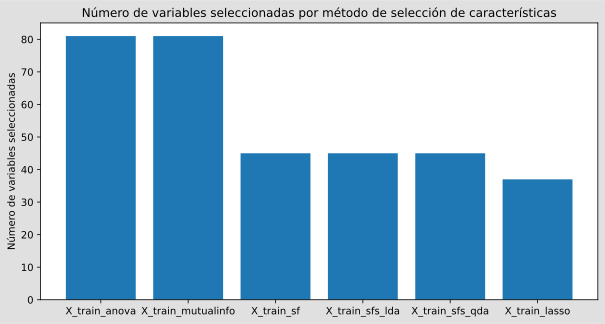

In [ ]:
# Bar plot of the number of features selected
plt.figure(figsize=(10,5))
plt.bar(names, [train_datasets[i].shape[1] for i in range(len(train_datasets))])
plt.ylabel('Número de variables seleccionadas')
plt.title('Número de variables seleccionadas por método de selección de características')
plt.show()


## Standarization

In [ ]:
scaler = StandardScaler() # Estandarizar los datos ya que el filtro es sensible a la escala
X_train_sfs_nb, X_test_sfs_nb = fit_transform_df(clf=scaler, X_train=X_train_sfs_nb, X_test=X_test_sfs_nb)
X_train_sfs_lda, X_test_sfs_lda = fit_transform_df(clf=scaler, X_train=X_train_sfs_lda, X_test=X_test_sfs_lda)
X_train_sfs_qda, X_test_sfs_qda = fit_transform_df(clf=scaler, X_train=X_train_sfs_qda, X_test=X_test_sfs_qda)
X_train_lasso, X_test_lasso = fit_transform_df(clf=scaler, X_train=X_train_lasso, X_test=X_test_lasso)

train_datasets = [X_train_scaled, X_train_anova, X_train_mutualinfo, X_train_sfs_nb, X_train_sfs_lda, X_train_sfs_qda, X_train_lasso]
test_datasets = [X_test_scaled, X_test_anova, X_test_mutualinfo, X_test_sfs_nb, X_test_sfs_lda, X_test_sfs_qda, X_test_lasso]

# Models

## Naive Bayes Gaussiano

#### Gaussian Naive Bayes - Model 1: Default parameters

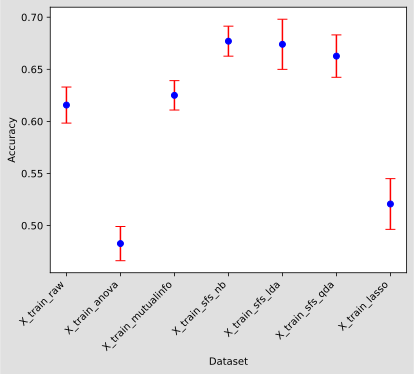

In [ ]:
names = ['X_train_raw', 'X_train_anova', 'X_train_mutualinfo', 'X_train_sfs_nb', 'X_train_sfs_lda', 'X_train_sfs_qda', 'X_train_lasso']
means = []
stds = []
for dataset in train_datasets:
    clf = GaussianNB() # Variables continuas, por tanto usamos Naive Bayes Gaussiano y asumimos normalidad
    scores = cross_val_score(clf, dataset, y_train, cv=5, scoring='accuracy')
    means.append(scores.mean())
    stds.append(scores.std())

plt.errorbar(names, means, yerr=stds, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")
plt.show()

Note: The feature selection datasets for LDA and QDA are included only to facilitate the code and should not be part of this section.

In [ ]:
print(max(means))

0.6769999999999999


In [ ]:
# Observamos las priors y varianza del mejor resultado del modelo 1
clf = GaussianNB()
clf.fit(X_train_sfs_nb, y_train)
print(clf.class_prior_)
print(clf.var_smoothing)

[0.236      0.41433333 0.34966667]
1e-09


### Gaussian Naive Bayes - Model 2: Searching for the best parameters by modifying them `priors` and `var_smoothing`

In [ ]:
clf = GaussianNB()
param_grid = {
    'priors': [[0.236, 0.41433333, 0.34966667], [0.14033333, 0.43566667, 0.424]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sfs_nb, y_train)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'priors': [0.236, 0.41433333, 0.34966667], 'var_smoothing': 1e-09}


From this, we can conclude that the class prior calculated by our model is better than what we could have thought of a priori, and we see that the default value of variance smoothing (1e-09) is optimal.

### Gaussian Naive Bayes - Model 3: Isotonic calibration

In [ ]:
gnb = GaussianNB()

for method in ['sigmoid', 'isotonic']:
  # Calibrar el modelo utilizando CalibratedClassifierCV
  calibrated_clf = CalibratedClassifierCV(base_estimator=gnb, method=method, cv=5)
  calibrated_clf.fit(X_train_sfs_nb, y_train)

  # Hacer predicciones
  y_prob = calibrated_clf.predict_proba(X_test_sfs_nb)

  # Evaluar el modelo
  logloss = log_loss(y_test, y_prob)

  print(f"Log Loss con calibración {method}:", round(logloss,3))
  print("")

Log Loss con calibración sigmoid: 0.742

Log Loss con calibración isotonic: 0.747



We obtain better calibration with the sigmoid method.

In [ ]:
calibrated_clf = CalibratedClassifierCV(base_estimator=gnb, method='sigmoid').fit(X_train_sfs_nb, y_train)
y_pred_train = calibrated_clf.predict(X_train_sfs_nb)
y_pred_test = calibrated_clf.predict(X_test_sfs_nb)
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

0.7166666666666667
              precision    recall  f1-score   support

           0       0.69      0.42      0.52       417
           1       0.68      0.72      0.70       859
           2       0.72      0.82      0.77       724

    accuracy                           0.70      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.69      0.70      0.69      2000



This is, therefore, the best model we obtain with Naive Bayes.

We see that with the heuristic preprocessing (Model 1), we achieve the best results, which leads us to believe that it correctly eliminates irrelevant features, as it retains roughly half the number of features compared to the other four models that come close in results. In the case of Lasso, we obtain significantly worse results, which may be because it is not suitable for this case. By eliminating so many features, it is removing very relevant information.

## Discriminant analysis

### Linear discriminant analysis

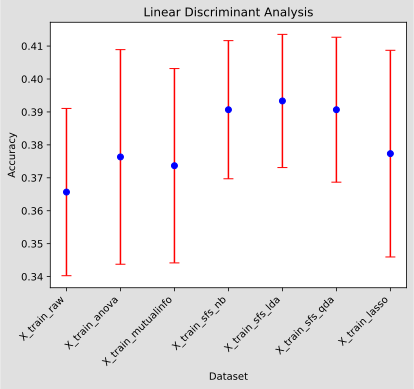

In [ ]:
names = ['X_train_raw', 'X_train_anova', 'X_train_mutualinfo', 'X_train_sfs_nb', 'X_train_sfs_lda', 'X_train_sfs_qda', 'X_train_lasso']
means1 = []
stds1 = []
for dataset in train_datasets:
    clf = LinearDiscriminantAnalysis()
    scores = cross_val_score(clf, dataset, y_train, cv=10, scoring='accuracy')
    means1.append(scores.mean())
    stds1.append(scores.std())

plt.errorbar(names, means1, yerr=stds1, fmt='o', color='blue', ecolor='red', capsize=5)
plt.title('Linear Discriminant Analysis')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")
plt.show()

Note: The feature selection datasets for QDA and Naive Bayes are included only to facilitate the code and should not be part of this section.

The best model we obtain is with the feature selection using Ridge regularization.

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_sfs_lda, y_train)
y_train_pred = clf.predict(X_train_sfs_lda)
y_test_pred = clf.predict(X_test_sfs_lda)
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

0.43466666666666665
              precision    recall  f1-score   support

           0       0.23      0.04      0.07       417
           1       0.42      0.78      0.55       859
           2       0.32      0.15      0.20       724

    accuracy                           0.40      2000
   macro avg       0.32      0.32      0.27      2000
weighted avg       0.34      0.40      0.32      2000



### Quadratic discriminant analysis

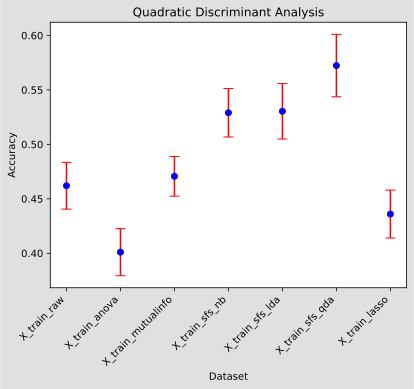

In [ ]:
means2 = []
stds2 = []
for dataset in train_datasets:
    clf = QuadraticDiscriminantAnalysis()
    scores = cross_val_score(clf, dataset, y_train, cv=10, scoring='accuracy')
    means2.append(scores.mean())
    stds2.append(scores.std())

plt.errorbar(names, means2, yerr=stds2, fmt='o', color='blue', ecolor='red', capsize=5)
plt.title('Quadratic Discriminant Analysis')
plt.xlabel('Dataset')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Accuracy')
plt.show()

Note: The feature selection datasets for LDA and Naive Bayes are included only to facilitate the code and should not be part of this section.

The best model we obtain is with feature selection using the heuristic method.

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_sfs_qda, y_train)
y_train_pred = clf.predict(X_train_sfs_qda)
y_test_pred = clf.predict(X_test_sfs_qda)
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

0.797
              precision    recall  f1-score   support

           0       0.41      0.40      0.40       417
           1       0.53      0.63      0.58       859
           2       0.70      0.56      0.62       724

    accuracy                           0.56      2000
   macro avg       0.55      0.53      0.53      2000
weighted avg       0.57      0.56      0.56      2000



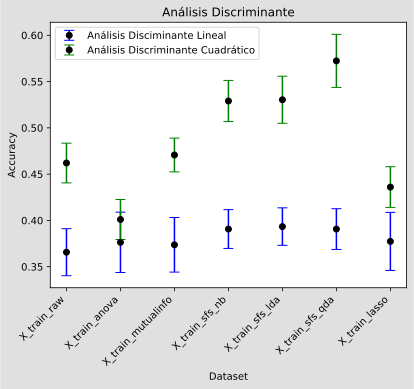

In [ ]:
plt.errorbar(names, means1, yerr=stds1, fmt='o', color='black', ecolor='blue', capsize=5)
plt.errorbar(names, means2, yerr=stds2, fmt='o', color='black', ecolor='green', capsize=5)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend(['Análisis Disciminante Lineal', 'Análisis Discriminante Cuadrático'])
plt.title('Análisis Discriminante')
plt.xticks(rotation=45, ha="right")
plt.show()

## Augmented Naive Bayes

In [ ]:
methods = ['Chow-Liu', 'NaiveBayes', 'TAN', 'MIIC', 'GHC', 'Tabu']
priors = ['Smoothing', 'BDeu', 'NoPrior']
discretizationStrategies = [ 'quantile', 'uniform', 'kmeans' ]

In [ ]:
best_method = None
best_score = 0
for method in methods:
    BNTest= skbn.BNClassifier(learningMethod = method)
    BNTest.fit(X_train, y_train)
    print(f"Method: {method} - Score: {BNTest.score(X_test, y_test)}")
    if BNTest.score(X_test, y_test) > best_score:
        best_score = BNTest.score(X_test, y_test)
        best_method = method

Method: Chow-Liu - Score: 0.6745
Method: NaiveBayes - Score: 0.589
Method: TAN - Score: 0.5925
Method: MIIC - Score: 0.7385
Method: GHC - Score: 0.7385
Method: Tabu - Score: 0.7385


In [ ]:
best_prior = None
best_score = 0
for prior in priors:
    BNTest= skbn.BNClassifier(learningMethod = best_method, prior= prior)
    BNTest.fit(X_train, y_train)
    print(f"Priot: {prior} - Score: {BNTest.score(X_test, y_test)}")
    if BNTest.score(X_test, y_test) > best_score:
        best_score = BNTest.score(X_test, y_test)
        best_prior = prior

Priot: Smoothing - Score: 0.7385
Priot: BDeu - Score: 0.7385
Priot: NoPrior - Score: 0.7385


In [ ]:
best_discretization = None
best_score = 0
for discretizationStrategy in discretizationStrategies:
    BNTest= skbn.BNClassifier(learningMethod = best_method, prior= best_prior,
                              discretizationStrategy = discretizationStrategy)
    BNTest.fit(X_train, y_train)
    print(f"Discretization strategy: {discretizationStrategy} - Score: {BNTest.score(X_test, y_test)}")
    if BNTest.score(X_test, y_test) > best_score:
        best_score = BNTest.score(X_test, y_test)
        best_discretization = discretizationStrategy

Discretization strategy: quantile - Score: 0.7385
Discretization strategy: uniform - Score: 0.704
Discretization strategy: kmeans - Score: 0.656


In [ ]:
BNTest= skbn.BNClassifier(learningMethod = best_method, prior= best_prior,
                          discretizationStrategy = best_discretization)
BNTest.fit(X_train, y_train)
print(f"Train score: {BNTest.score(X_train, y_train)}")
print(f"Test score: {BNTest.score(X_test, y_test)}")

Train score: 0.7063333333333334
Test score: 0.7385


## Bagging

We don't have any hyperparameters to adjust; the more estimators, the better the result we will have. However, we will analyze at what point the improvement we get becomes minimal.

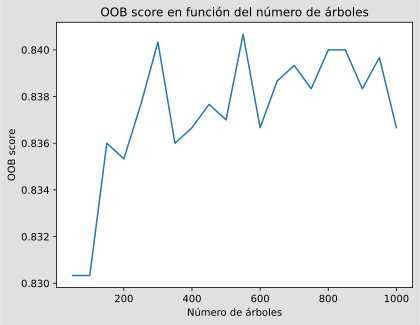

In [ ]:
oob_scores = []
for n in range(50, 1001, 50):
  clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n, oob_score=True, n_jobs=-1)
  clf.fit(X_train, y_train)
  oob_scores.append(clf.oob_score_)

plt.plot(range(50, 1001, 50), oob_scores)
plt.xlabel('Número de árboles')
plt.ylabel('OOB score')
plt.title('OOB score en función del número de árboles')
plt.show()

Therefore, if we have excess computing power, we would use the maximum number of estimators possible. On the other hand, to balance the minimum number of estimators (to save resources) and the maximum possible accuracy, we would choose **n=750**. In fact, if resources are limited, we could choose n=350, where the computational cost would be less than half, and the loss in accuracy would only be around 0.002.

**Bagging Results**

In [ ]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=750, oob_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_test_pred= clf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred)}")

Test accuracy: 0.847


## Random Forest

We will adjust the parameters sequentially.

In [ ]:
# Números de características a considerar
max_features = ['sqrt', 'log2', None]
for feature in max_features:
    clf = RandomForestClassifier(max_features=feature, oob_score=True, n_jobs=-1, n_estimators=2000)
    clf.fit(X_train, y_train)
    print(f"Train accuracy with max_features={feature}: {accuracy_score(y_train, clf.predict(X_train))}")
    print(f"OOB score with max_features={feature}: {clf.oob_score_}")

Train accuracy with max_features=sqrt: 1.0
OOB score with max_features=sqrt: 0.7073333333333334
Train accuracy with max_features=log2: 1.0
OOB score with max_features=log2: 0.6543333333333333
Train accuracy with max_features=None: 1.0
OOB score with max_features=None: 0.8403333333333334


We obtain much better results with `max_features = None`. This is equivalent to Bagging.

In [ ]:
criterions = ['gini', 'entropy']
for criterion in criterions:
    clf = RandomForestClassifier(criterion=criterion, max_features=None, oob_score=True, n_jobs=-1, n_estimators=350)
    clf.fit(X_train, y_train)
    print(f"TrainAccuracy with criterion={criterion}: {accuracy_score(y_train, clf.predict(X_train))}")
    print(f"OOB score with criterion={criterion}: {clf.oob_score_}")

TrainAccuracy with criterion=gini: 1.0
OOB score with criterion=gini: 0.8373333333333334
TrainAccuracy with criterion=entropy: 1.0
OOB score with criterion=entropy: 0.856


We will use Gini because it provides a very similar result (even slightly better) and is more computationally efficient. Finally, we will adjust the number of estimators.

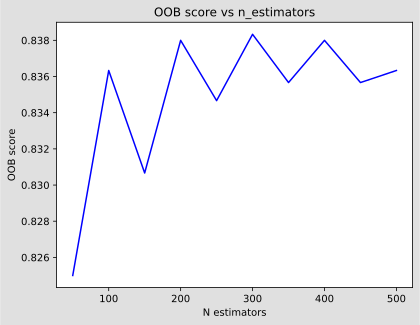

Best result: 0.8383333333333334


In [ ]:
oob_scores = []
for i in range(50, 501, 50):
    clf = RandomForestClassifier(n_estimators=i, max_features=None, criterion='gini', oob_score=True, n_jobs=-1)
    clf.fit(X_train, y_train)
    oob_scores.append(clf.oob_score_)

plt.plot(range(50, 501, 50), oob_scores, color='blue')
plt.xlabel('N estimators')
plt.ylabel('OOB score')
plt.title('OOB score vs n_estimators')
plt.show()
print("Best result:", max(oob_scores))

We see that the optimal value for the number of estimators is 450. However, as with bagging, we could continue increasing the number of estimators.

**Random Forest Results**

In [ ]:
clf = RandomForestClassifier(n_estimators=450, max_features=None, criterion='gini', n_jobs=-1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Test accuracy: 0.844


## AdaBoost

In [ ]:
# We define a low learning rate and from there, we will search for the optimal number of estimators.
lr = 0.05

In [ ]:
# DT_STUMP
dt_stump = DecisionTreeClassifier(max_depth=2) # Ajustamos max depth = 2 porque tenemos 3 clases

In [ ]:
algorithms = ['SAMME','SAMME.R']
for algorithm in algorithms:
    clf = AdaBoostClassifier(dt_stump, algorithm=algorithm , learning_rate=lr, n_estimators=500)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    print(f"Train accuracy with {algorithm}: {clf.score(X_train, y_train)}")
    print(f"Test  accuracy with {algorithm}: {accuracy_score(y_test_pred, y_test)}")

Train accuracy with SAMME: 0.775
Test  accuracy with SAMME: 0.7735
Train accuracy with SAMME.R: 0.717
Test  accuracy with SAMME.R: 0.7135


We obtain significantly better results with SAMME.

From here, we introduce more estimators and check whether the improvement justifies the computational load, while also ensuring there is no overfitting.

In [ ]:
clf = AdaBoostClassifier(dt_stump, algorithm='SAMME', learning_rate=lr, n_estimators=1000)
clf.fit(X_train, y_train)
print(f"Train accuracy with 1000 estimators: {clf.score(X_train, y_train)}")
print(f"Test  accuracy with 1000 estimators: {accuracy_score(clf.predict(X_test), y_test)}")


Train accuracy with 1000 estimators: 0.7756666666666666
Test  accuracy with 1000 estimators: 0.7735


We see that we don't achieve any improvement. We change the base tree.

In [ ]:
dt_stump = DecisionTreeClassifier(max_depth=4, max_features=None, criterion='gini')
clf = AdaBoostClassifier(dt_stump, algorithm='SAMME', learning_rate=lr, n_estimators=1000)
clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test  accuracy: {accuracy_score(clf.predict(X_test), y_test)}")


Train accuracy: 0.893
Test  accuracy: 0.83


In [ ]:
'''
dt_stump = DecisionTreeClassifier(max_depth=7, max_features=None, criterion='gini')
clf = AdaBoostClassifier(dt_stump, algorithm='SAMME', learning_rate=lr, n_estimators=1000)
clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test  accuracy: {accuracy_score(clf.predict(X_test), y_test)}")
'''
# More than 7 minutes of execution, and the result is the same as the following model.


'\ndt_stump = DecisionTreeClassifier(max_depth=7, max_features=None, criterion=\'gini\')\nclf = AdaBoostClassifier(dt_stump, algorithm=\'SAMME\', learning_rate=lr, n_estimators=1000)\nclf.fit(X_train, y_train)\nprint(f"Train accuracy: {clf.score(X_train, y_train)}")\nprint(f"Test  accuracy: {accuracy_score(clf.predict(X_test), y_test)}")\n'

In [ ]:
dt_stump = DecisionTreeClassifier(max_depth=7, max_features=None, criterion='gini')
clf = AdaBoostClassifier(dt_stump, algorithm='SAMME', learning_rate=lr, n_estimators=100)
clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test  accuracy: {accuracy_score(clf.predict(X_test), y_test)}")

Train accuracy: 0.9333333333333333
Test  accuracy: 0.8495


We achieve a significant improvement in model performance compared to the previous models. However, the variance has increased considerably compared to the original tree stump, and the execution time is 4 minutes.

## Boosting

In boosting, we will use the log loss loss function to avoid penalizing outliers too much.

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=7, loss='log_loss')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print("Accuracy train:", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy test:", accuracy_score(y_test, y_test_pred))

Accuracy train: 0.985
Accuracy test: 0.848


We have conducted other tests with different parameters, but we obtained the best results with the same parameters as AdaBoost.